# Problem Statement 
A company launches Ebuss its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

A model can be build to improve the recommendations given to the users given their past reviews and ratings. That is, a sentiment based user recommendation system is needs to can help Ebuss grow quickly in the e-commerce market to become a major leader in the market

#### Data sourcing and sentiment analysis
Analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products.
<li>Exploratory data analysis
<li>Data cleaning
<li>Text preprocessing
<li>Feature extraction
<li>Training a text classification model  


#### Building a recommendation system
<li>User-based recommendation system
<li>Item-based recommendation system
    


#### Improving the recommendations using the sentiment analysis model
<li>Deploying the end-to-end project with a user interface

## Install necessary packages 

In [ ]:
#Install required libraries 
#pip install nltk 
#pip install matplotlib
#pip install mlxtend
#pip install seaborn
#pip install wordcloudmlxtend
#pip install imblearn
#pip install xgboost
#pip install sklearn
#pip install spacy

In [ ]:
#pip install nltk("en_core_web_sm")

In [ ]:
#pip install en_core_web_sm

In [ ]:
#!python -m spacy download en_core_web_sm

## Import required libraries 

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from PIL import Image

# sklearn imports for modeling part
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
#download nltk libraries required 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import SnowballStemmer

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mp42657\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mp42657\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Dataset Details 

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('sample30.csv')

In [4]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [5]:
df.shape

(30000, 15)

## Exploratory data analysis

In [6]:
# Get summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
# converting reviews to str dtype 
df.reviews_username = df.reviews_username.astype(str)

In [8]:
# Rating  - Basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews_rating,30000.0,4.483133,0.988441,1.0,4.0,5.0,5.0,5.0


In [9]:
# Check first few rows to get the feel of the dataset
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [10]:
# Lets check the random distribution 
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:xlabel='reviews_rating', ylabel='Density'>

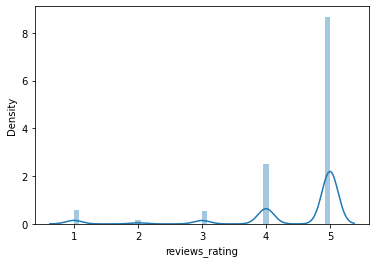

In [11]:
#Let's visualize the distribution of rating
sns.distplot(df['reviews_rating'])

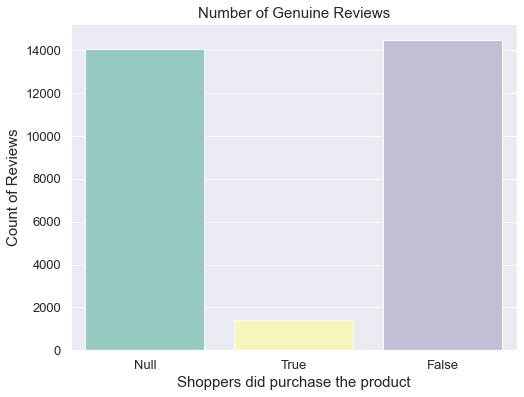

In [12]:
#on the reviews_didpurchase column, replace null values with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

#checking distribution of reviews_didpurchased

plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(df['reviews_didPurchase'],palette="Set3")
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=15)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=15)
ax.axes.set_title('Number of Genuine Reviews', fontsize=15)
ax.tick_params(labelsize=13)
plt.show()

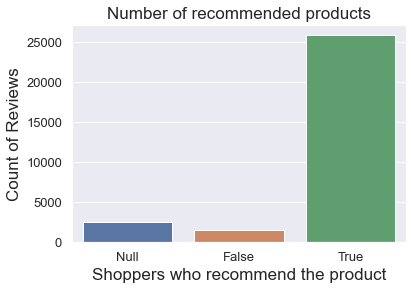

True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

In [13]:
#on the reviews_doRecommend column, replace null values with "Null"
df['reviews_doRecommend'].fillna('Null', inplace=True)
#checking distribution of reviews_didpurchased

plt.figure(figsize=(6,4))
ax = sns.countplot(df['reviews_doRecommend'])
ax.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of recommended products', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()
df['reviews_doRecommend'].value_counts()

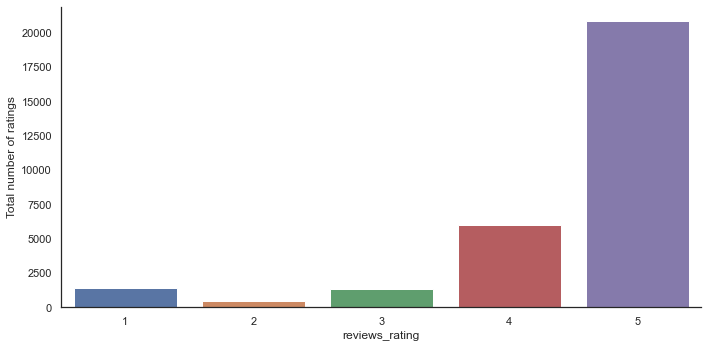

In [14]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot( x='reviews_rating', data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

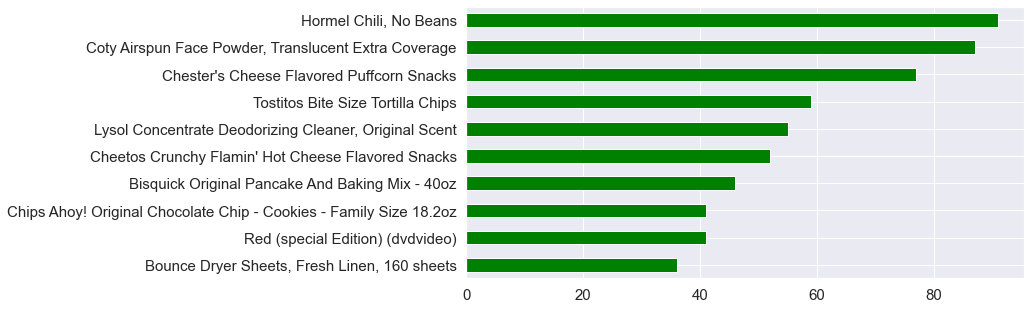

In [15]:
#Checking top 10 most purchased product
result = df[df['reviews_didPurchase'] == True]
#ax.set_color(['red', 'black', 'yellow'])
result['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,5], fontsize=15,color='Green').invert_yaxis()

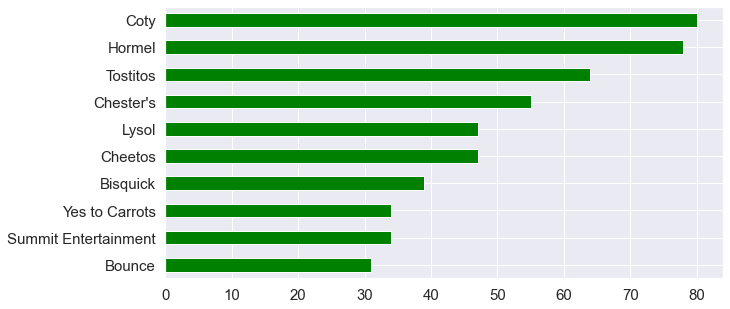

In [16]:
#Checking top 10 most trusted brands based on the positive review
from matplotlib import cm
result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,5], fontsize=15,color='Green').invert_yaxis()

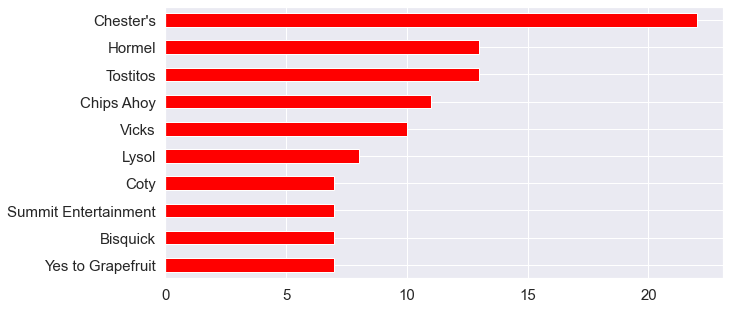

In [17]:
#Checking top 10 most badly rated brands based on the negative review
from matplotlib import cm
result = df[(df['reviews_didPurchase'] == True) & (df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,5], fontsize=15,color='Red').invert_yaxis()

In [18]:
#--- ratings distribution with product id
ratings=pd.DataFrame(df.groupby('id')['reviews_rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('id')['reviews_rating'].count())
ratings.head()

,reviews_rating,Number_Of_Ratings
id,,
AV13O1A8GV-KLJ3akUyj,5.000000,1
AV14LG0R-jtxr-f38QfS,5.000000,2
AV16khLE-jtxr-f38VFn,2.518519,27
AV1YGDqsGV-KLJ3adc-O,4.129310,348
AV1YIch7GV-KLJ3addeG,5.000000,1


Text(0.5, 1.0, 'Distribution of Ratings')

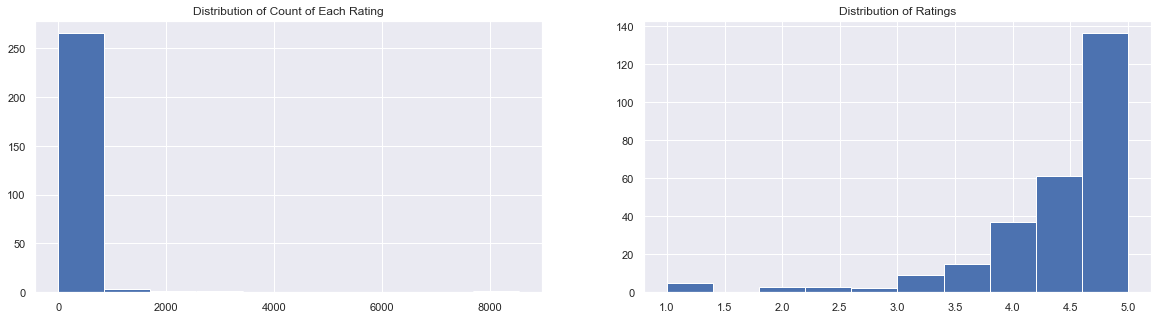

In [19]:
#distribution of count of ratings and mean ratings
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings)
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.reviews_rating)
plt.title('Distribution of Ratings')

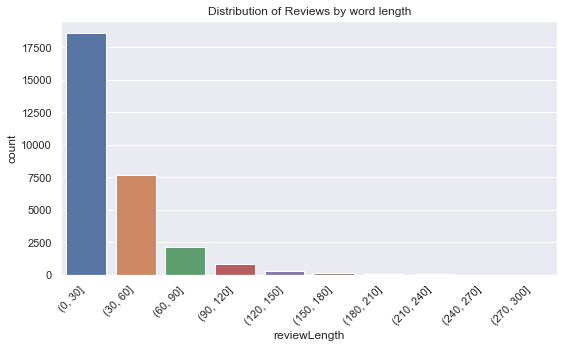

In [20]:
#f, axes = plt.subplots(1,1, figsize=(12,8))
#---- Distribution of word reviews by length
f = plt.figure(figsize=(8,5))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLength'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_word_length = df_reviews.groupby(pd.cut(df_reviews.reviewLength, np.arange(0,330,30))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length)
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

<AxesSubplot:ylabel='reviews_rating'>

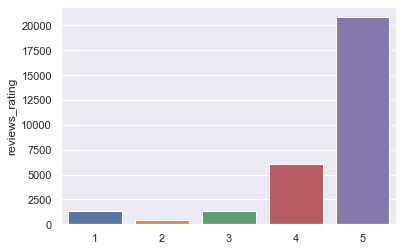

In [21]:
sns.set(rc={"figure.figsize":(6, 4)}) #width=8, height=4
sns.barplot(x=df.reviews_rating.value_counts().index, y=df.reviews_rating.value_counts())

<AxesSubplot:ylabel='brand'>

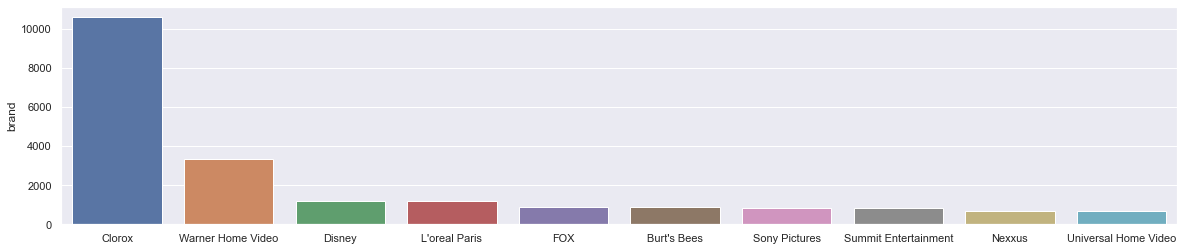

In [22]:
#sns.countplot(x='brand', data=dfRelevant)
sns.set(rc={"figure.figsize":(20, 4)}) #width=8, height=4
sns.barplot(x=df.brand.value_counts()[:10].index, y=df.brand.value_counts()[:10])

<AxesSubplot:ylabel='reviews_username'>

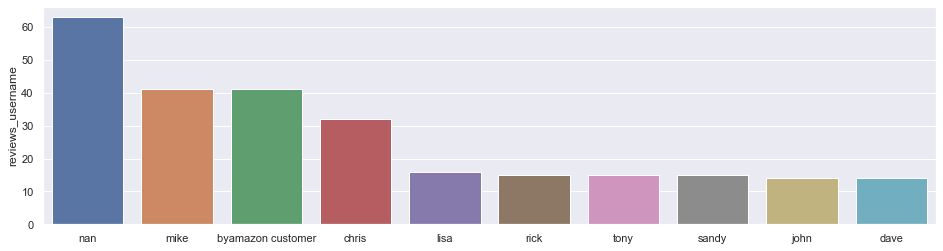

In [23]:
sns.set(rc={"figure.figsize":(16, 4)}) #width=8, height=4
sns.barplot(x=df.reviews_username.value_counts()[0:10].index, y=df.reviews_username.value_counts()[0:10])

Most users have provided anonymous reviews

<AxesSubplot:xlabel='name'>

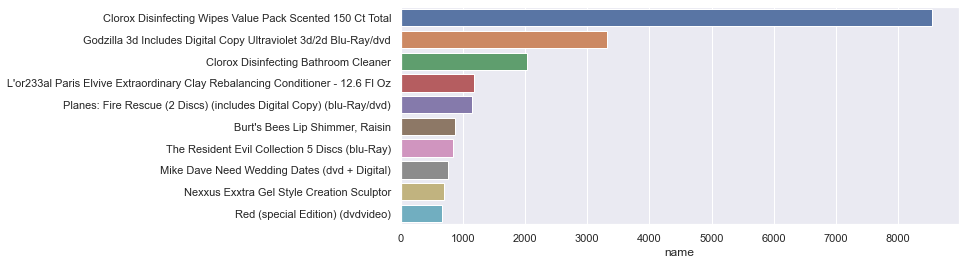

In [24]:
sns.set(rc={"figure.figsize":(10, 4)}) #width=8, height=4
sns.barplot(y=df.name.value_counts()[0:10].index, x=df.name.value_counts()[0:10])

## Data Cleanup

In [25]:
# Check for missing values percentage in different columns
def checkMissingPercentage(df):
    null = []
    for i in df.isnull().sum()*100/df.shape[0]:
        null.append(i)
    data = {'columns': list(df), '% null': null}
    df_null = pd.DataFrame(data)
    df_null= df_null[df_null['% null'] != 0]
    df_null=df_null.sort_values(by='% null', ascending=False, inplace=False)
    display(df_null)
    return df_null

In [26]:
dfNonNullCols = checkMissingPercentage(df)

,columns,% null
12,reviews_userProvince,99.433333
11,reviews_userCity,93.570000
10,reviews_title,0.633333
3,manufacturer,0.470000
5,reviews_date,0.153333
14,user_sentiment,0.003333


In [27]:
#Get the list of the columns having 25% or more missing values 
list(dfNonNullCols[dfNonNullCols["% null"] > 25]["columns"])

['reviews_userProvince', 'reviews_userCity']

In [28]:
#Lets remove the fields which have very high percentage of missing data found above
dfNonNull = df.drop(list(dfNonNullCols[dfNonNullCols["% null"] > 25]["columns"]), axis = 1)
print('Shape of the orginal dataset :', df.shape)
print('Shape after dropping:', dfNonNull.shape)

Shape of the orginal dataset : (30000, 15)
Shape after dropping: (30000, 13)


In [29]:
round(100*dfNonNull.isnull().sum()/len(dfNonNull),4)

id                     0.0000
brand                  0.0000
categories             0.0000
manufacturer           0.4700
name                   0.0000
reviews_date           0.1533
reviews_didPurchase    0.0000
reviews_doRecommend    0.0000
reviews_rating         0.0000
reviews_text           0.0000
reviews_title          0.6333
reviews_username       0.0000
user_sentiment         0.0033
dtype: float64

In [30]:
dfNonNull.isnull().sum()

id                       0
brand                    0
categories               0
manufacturer           141
name                     0
reviews_date            46
reviews_didPurchase      0
reviews_doRecommend      0
reviews_rating           0
reviews_text             0
reviews_title          190
reviews_username         0
user_sentiment           1
dtype: int64

In [31]:
dfNonNull = dfNonNull[dfNonNull['user_sentiment'].notna()]

In [32]:

dfRelevant= dfNonNull[['id','brand', 'categories', 'manufacturer', 'name',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment']]

In [33]:
dfRelevant['reviews_doRecommend'] = dfRelevant['reviews_doRecommend'].map(dict([(False,0),(True,1)]))

In [34]:
dfRelevant['user_sentiment'] = dfRelevant['user_sentiment'].map(dict([('Negative',0),('Positive',1)]))

In [35]:
dfRelevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29999 non-null  object 
 1   brand                29999 non-null  object 
 2   categories           29999 non-null  object 
 3   manufacturer         29858 non-null  object 
 4   name                 29999 non-null  object 
 5   reviews_doRecommend  27429 non-null  float64
 6   reviews_rating       29999 non-null  int64  
 7   reviews_text         29999 non-null  object 
 8   reviews_title        29809 non-null  object 
 9   reviews_username     29999 non-null  object 
 10  user_sentiment       29999 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.7+ MB


In [36]:
dfRelevant['reviews_rating'].describe()

count    29999.000000
mean         4.483116
std          0.988453
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [37]:
pd.crosstab(dfRelevant["user_sentiment"], dfRelevant["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


In [38]:
print("\nTotal no of ratings :",dfRelevant.shape[0])
print("Unique Users   :", len(np.unique(dfRelevant.reviews_username)))
print("Unique products  :", len(np.unique(dfRelevant.name)))


Total no of ratings : 29999
Unique Users   : 24915
Unique products  : 271


In [39]:
#Top 10 buyers 
dfRelevant["reviews_username"].value_counts()[:10]

nan                  63
mike                 41
byamazon customer    41
chris                32
lisa                 16
rick                 15
tony                 15
sandy                15
john                 14
dave                 14
Name: reviews_username, dtype: int64

In [40]:
#Top 10 bought products
dfRelevant["name"].value_counts()[:10]

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1142
Burt's Bees Lip Shimmer, Raisin                                                    873
The Resident Evil Collection 5 Discs (blu-Ray)                                     845
Mike Dave Need Wedding Dates (dvd + Digital)                                       757
Nexxus Exxtra Gel Style Creation Sculptor                                          693
Red (special Edition) (dvdvideo)                                                   672
Name: name, dtype: int64

In [41]:
dfRelevant['reviews_text']=dfRelevant['reviews_text'].str.lower() 

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def remove_punctuation(text):
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [44]:
#removing punctuation & adding review header & review text after cleaning to a new column
dfRelevant['reviews_text_clean'] = dfRelevant['reviews_text'].apply(lambda x: remove_punctuation(str(x))) + ' ' + df['reviews_text'].apply(lambda x: remove_punctuation(x))

In [45]:
dfRelevant['reviews_text_clean']

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                  good flavor Good flavor
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: reviews_text_clean, Length: 29999, dtype: object

In [46]:
dfRelevant = dfRelevant[['id','name','reviews_text_clean', 'user_sentiment']]

In [47]:
dfRelevant.head(5)

,id,name,reviews_text_clean,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album its very good more to the hi...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor this review was collected as part ...,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good flavor Good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,i read through the reviews on here before look...,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,my husband bought this gel for us the gel caus...,0


In [48]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'doesn', 'shan', 'against', 'whom', 'about', "aren't", 'ourselves', "wasn't", 'wouldn', 'is', 'until', 'when', 're', 'ma', 'on', "shan't", 'o', 'where', 'up', 've', 'being', 'did', 's', 'ain', "couldn't", 'hadn', "needn't", 'were', 'isn', 'hasn', 'this', 'am', 'his', 'theirs', 'who', 'so', 'should', 'just', 'does', 'for', 'doing', 'her', 'a', "don't", 'itself', 'no', 'between', "you'll", 'by', "haven't", 'with', 'why', 't', 'its', 'she', 'will', 'once', 'before', 'are', 'it', 'an', "mustn't", 'and', 'didn', 'if', 'at', 'through', 'them', 'down', 'm', "it's", 'such', 'll', 'both', 'to', 'me', 'can', 'off', 'needn', 'own', "didn't", 'be', 'again', 'all', 'him', 'herself', 'only', 'same', 'had', 'more', "doesn't", 'weren', 'your', 'yourself', "isn't", 'other', 'that', 'now', "shouldn't", 'been', "you'd", 'having', 'as', 'from', "hasn't", 'hers', 'has', "you've", 'in', 'than', 'then', 'over', 'which', 'above', 'ours', 'themselves', 'was', 'have', "hadn't", 'myself', "weren't", 'won', 'few

In [49]:
# Function to remove the stopwords
def clean_stopwords(sent):
    sent = sent.lower() # Text to lowercase
    #print(sent)
    words = word_tokenize(sent) # Split sentences into words
    #print(words)
    text_nostopwords = " ".join( [each_word for each_word in words if each_word not in stopwords_set] )
    #print(text_nostopwords)
    return text_nostopwords

In [50]:
dfRelevant['reviews_without_stopwords'] = dfRelevant['reviews_text_clean'].apply(clean_stopwords)

In [51]:
dfRelevant['reviews_without_stopwords']

0        love album good hip hop side current pop sound...
1        good flavor review collected part promotion go...
2                                  good flavor good flavor
3        read reviews looking buying one couples lubric...
4        husband bought gel us gel caused irritation fe...
                               ...                        
29995    got conditioner influenster try im loving far ...
29996    love received review purposes influenster leav...
29997    first love smell product wash hair smooth easy...
29998    received influenster never go back anything el...
29999    received product complimentary influenster rea...
Name: reviews_without_stopwords, Length: 29999, dtype: object

In [52]:
import re, nltk, spacy, string
import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

In [53]:
#Function to lemmatize the text
def clean_lemma(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)

In [54]:
dfRelevant['reviews_lemmatized'] = dfRelevant['reviews_without_stopwords'].apply(clean_lemma)

In [55]:
dfRelevant['reviews_lemmatized']

0        love album good hip hop side current pop sound...
1        good flavor review collect part promotion good...
2                                  good flavor good flavor
3        read review look buy one couple lubricant ulti...
4        husband buy gel us gel cause irritation feel l...
                               ...                        
29995    get conditioner influenster try I m love far o...
29996    love receive review purpose influenster leave ...
29997    first love smell product wash hair smooth easy...
29998    receive influenster never go back anything els...
29999    receive product complimentary influenster real...
Name: reviews_lemmatized, Length: 29999, dtype: object

In [56]:
df_pos = dfRelevant.loc[dfRelevant['user_sentiment']==1] # positive reviews dataframe
#number of positive reviews 
len(df_pos)

26632

In [58]:
stop_words = set(STOPWORDS)

In [59]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=600, height=300)

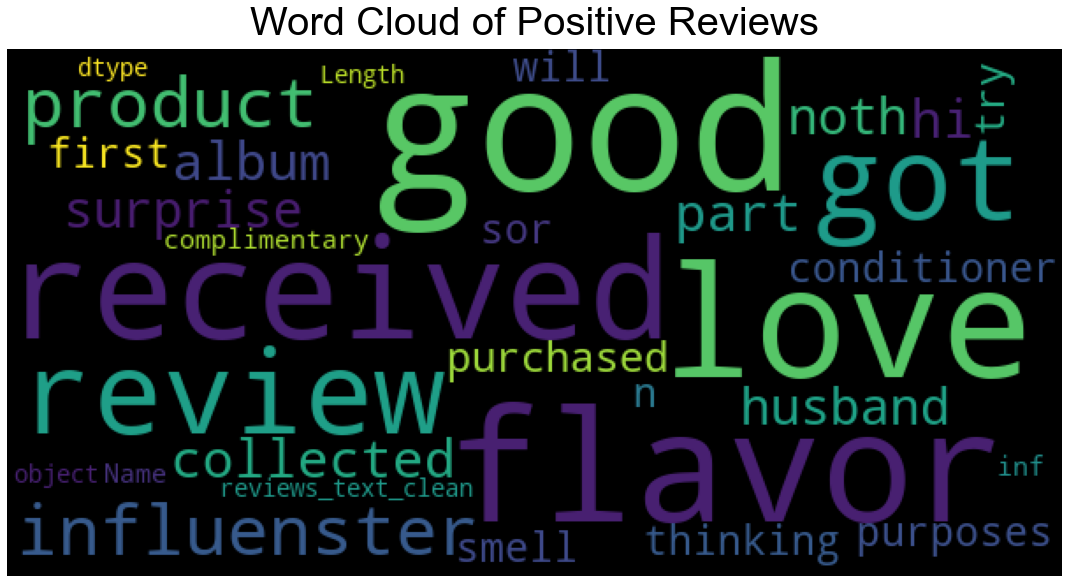

In [60]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['reviews_text_clean']))
plt.figure(figsize=(15.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

In [61]:
df_neg = dfRelevant.loc[dfRelevant['user_sentiment']==0] # positive reviews dataframe
#number of negative reviews 
len(df_neg)

3367

Glance through the some negative reviews submitted 

In [63]:
print("\n\t".join(df_neg["reviews_lemmatized"][0:5].to_list()))

read review look buy one couple lubricant ultimately disappoint do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect I m disappoint pay much lube will not use could use normal personal lubricant 1 less money 2 less mess read review look buy one couple lubricant ultimately disappoint do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect I m disappoint pay much lube will not use could use normal personal lubricant 1 less money 2 less mess
	husband buy gel us gel cause irritation feel like burn skin would not recommend gel husband buy gel us gel cause irritation feel like burn skin would not recommend gel
	boyfriend buy spice th

In [65]:
print("\n\t".join(df_pos["reviews_lemmatized"][0:5].to_list()))

love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
	good flavor review collect part promotion good flavor review collect part promotion
	good flavor good flavor
	get surprise husband nothing special lube save money get plain ky need lube wish could return refund get surprise husband nothing special lube save money get plain ky need lube wish could return refund
	purchased thinking would sort warm effect original do not waste money purchase thinking would sort warm effect original do not waste money


In [66]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=600, height=300)

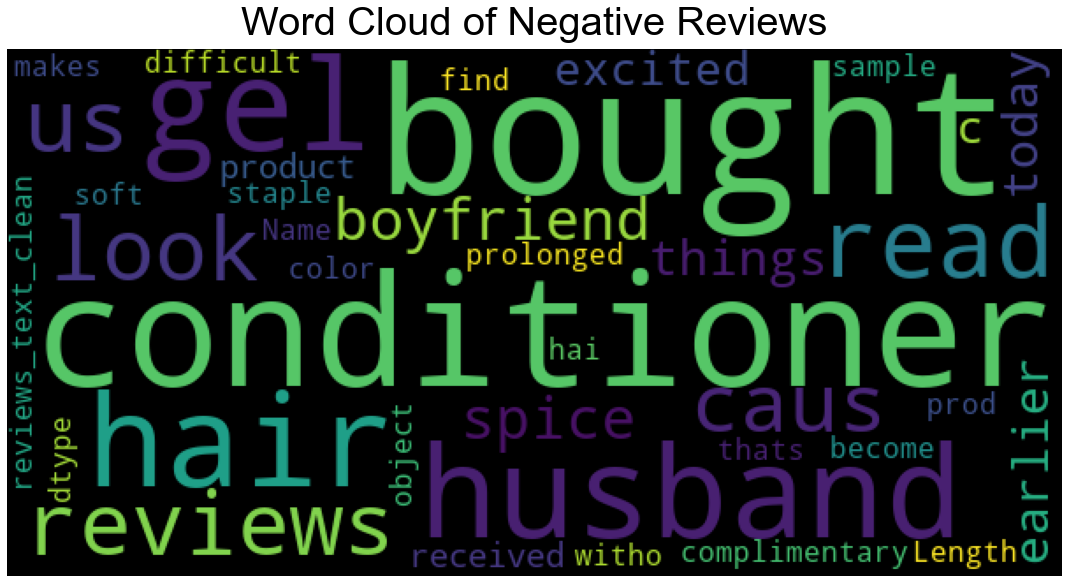

In [67]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_neg['reviews_text_clean']))
plt.figure(figsize=(15.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

In [68]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

In [69]:
## Top 25 Common Words List in Positive Reviews
word_frequency=word_count(df_pos['reviews_text_clean']) #tokenize and count and create dictionary

In [70]:
# to create dataframe from most common words dictionary
df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [72]:
stop = set(stopwords.words("english")) #setting stopwords


In [73]:
# taking only words which are not stopwords

df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [74]:
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [75]:
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

<AxesSubplot:title={'center':'Positive Reviews Common Words'}, xlabel='count', ylabel='word'>

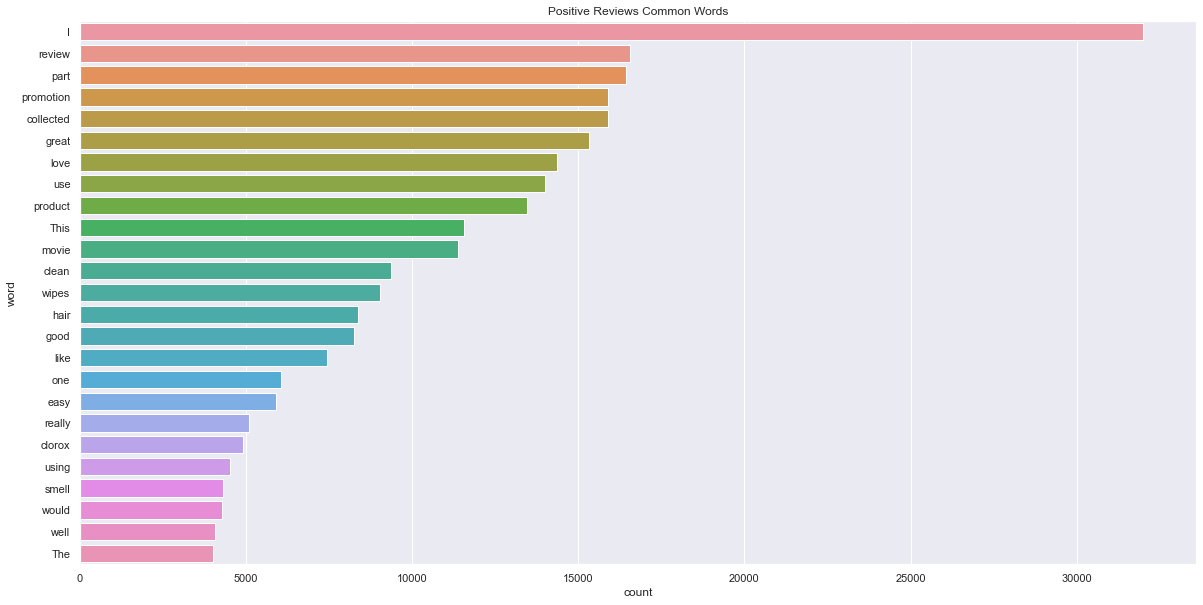

In [76]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot(y="word",x="count", data=df_top_25_pos)

In [77]:
word_frequency_neg=word_count(df_neg['reviews_text_clean'])

In [78]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)

In [79]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [80]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

<AxesSubplot:title={'center':'Negative Reviews Common Words'}, xlabel='count', ylabel='word'>

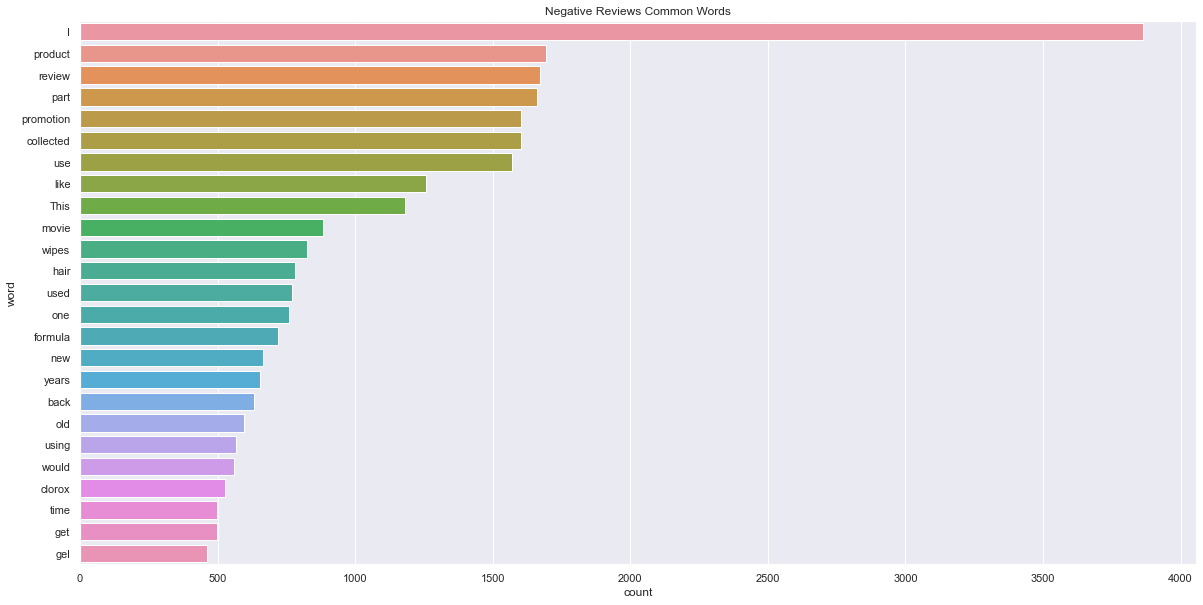

In [81]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot(y= "word",x="count", data=df_top_25_neg)

In [82]:
dfRelevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         29999 non-null  object
 1   name                       29999 non-null  object
 2   reviews_text_clean         29999 non-null  object
 3   user_sentiment             29999 non-null  int64 
 4   reviews_without_stopwords  29999 non-null  object
 5   reviews_lemmatized         29999 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.6+ MB


In [83]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [84]:
# saving data for future purpose
import pickle as pickle
pickle.dump(dfRelevant, open("cleaned-data.pkl","wb"))


In [85]:
dfRelevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         29999 non-null  object
 1   name                       29999 non-null  object
 2   reviews_text_clean         29999 non-null  object
 3   user_sentiment             29999 non-null  int64 
 4   reviews_without_stopwords  29999 non-null  object
 5   reviews_lemmatized         29999 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.6+ MB


In [88]:
import pickle
from pathlib import Path
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(dfRelevant['reviews_lemmatized'])
X = tfidf_vectorizer.transform(dfRelevant['reviews_lemmatized'])
y = dfRelevant['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [89]:
### Class Imbalance check and method to handle it
dfRelevant.groupby(['user_sentiment']).count()

,id,name,reviews_text_clean,reviews_without_stopwords,reviews_lemmatized
user_sentiment,,,,,
0,3367,3367,3367,3367,3367
1,26632,26632,26632,26632,26632


## Handling class imbalance 

In [90]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("Before", counter)

#oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({1: 20002, 0: 2497})
After Counter({1: 20002, 0: 20002})


In [91]:
#### Creating a method for confusion matrix and scores
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)
    print('\n')
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

In [92]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sm, y_train_sm)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))

Sensitivity for C = 0.01 is 0.7850678733031674
Specificity for C = 0.01 is 0.8298850574712644
Sensitivity for C = 0.05 is 0.8211161387631976
Specificity for C = 0.05 is 0.8448275862068966
Sensitivity for C = 0.25 is 0.8773755656108597
Specificity for C = 0.25 is 0.832183908045977
Sensitivity for C = 0.5 is 0.9013574660633484
Specificity for C = 0.5 is 0.8218390804597702
Sensitivity for C = 1 is 0.9218702865761689
Specificity for C = 1 is 0.8057471264367816


In [93]:
final_lr = LogisticRegression(C=0.05)
final_lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.05)

LogisticRegression(C=0.05)


Accuracy is  0.8238666666666666
Sensitivity is 0.8211161387631976
Specificity is 0.8448275862068966


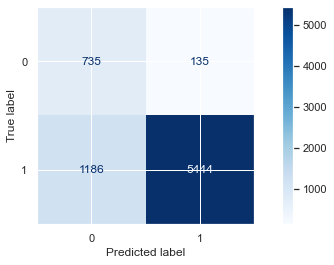

In [94]:
display_score(final_lr)

In [95]:
# saving the model
pickle.dump(final_lr, open('sentiment-classification-logistic-regression-model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf-vectorizer.pkl", "wb"))

In [96]:
tfs=pd.read_pickle('tfidf-vectorizer.pkl')
mdl=pd.read_pickle('sentiment-classification-logistic-regression-model.pkl')

In [180]:
tfs

TfidfVectorizer(ngram_range=(1, 2))

In [97]:
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr.coef_[0])
}

print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
    
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 6.014284199069553)
('love', 5.100078788303648)
('good', 4.699397004844035)
('clean', 3.131626793920153)
('easy', 2.927637397763049)
('easy use', 1.5866357782784448)
('enjoy', 1.5821972021924986)
('really', 1.5424584854778072)
('awesome', 1.457938546022958)
('well', 1.4234922956322666)
Negative Words
('bad', -2.090626970841769)
('evil', -1.5161225626747077)
('resident', -1.3744120898871124)
('resident evil', -1.3680493206851088)
('horrible', -1.180907436576897)
('formula', -1.1633976555011325)
('use clorox', -1.0407024106996206)
('terrible', -1.0382488127758611)
('sick', -0.9945260586639001)
('gel', -0.9782257653892934)


In [98]:
#Fitting a Random Forest classifier without any hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

RandomForestClassifier()


Accuracy is  0.9112
Sensitivity is 0.9757164404223228
Specificity is 0.41954022988505746


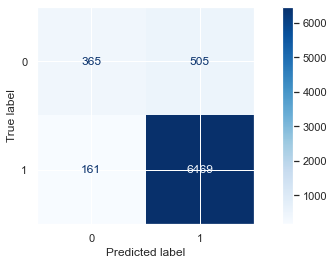

In [99]:
display_score(rf)

In [100]:
##### Fitting a Random Forest classifier with various hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}

# Create a based model
final_rf = RandomForestClassifier()

# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = final_rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [101]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)
print("Best hyperparameters: ", rf_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8838310929142968
Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)


Accuracy is  0.8294666666666667
Sensitivity is 0.8647058823529412
Specificity is 0.5609195402298851


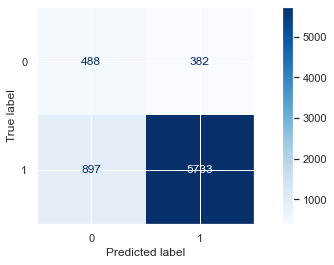

In [102]:
#Test data performance metrics
display_score(rf_tuned)

In [103]:
# Fitting Naive Bayes Model
nb=MultinomialNB()
nb.fit(X_train_sm, y_train_sm)

MultinomialNB()

MultinomialNB()


Accuracy is  0.8818666666666667
Sensitivity is 0.9143288084464555
Specificity is 0.6344827586206897


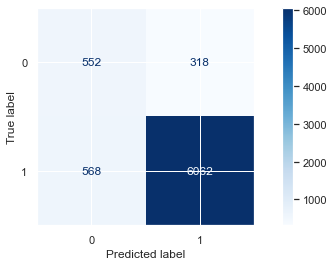

In [104]:
#Test Data Performance Metrics
display_score(nb)

In [105]:
#### Fitting a XGBoost classifier without any hyperparameter tuning
# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

final_xgb = XGBClassifier(booster='gbtree')
final_xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy is  0.9041333333333333
Sensitivity is 0.9167420814479638
Specificity is 0.8080459770114943


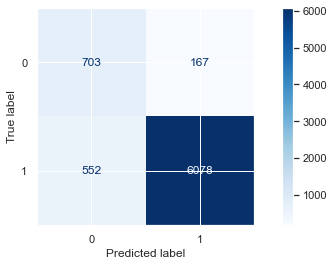

In [106]:
#### Displaying Confusion matrix Scores
#Test data performance metrics
display_score(final_xgb)

In [107]:
#### Fitting a XGBoost classifier with various custom hyperparameters.

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

final_xgb = XGBClassifier(booster='gbtree')

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [108]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8689854971705531
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

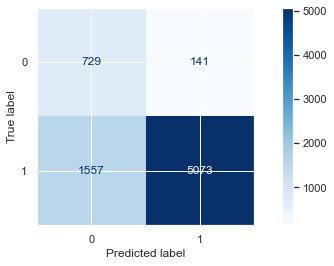

In [109]:
#### Displaying Confusion matrix Scores
# Test data performance metrics
display_score(xgb_tuned)

## Model Comparison

In [110]:
results = {('LR'):[0.83, 0.85, 0.74], ('NB'):[0.86, 0.89, 60], ('XGB'):[0.90, 0.94, 0.59], ('XGB Tuned'):[0.85, 0.87, 0.64],
 ('RF'):[0.91, 0.99, 0.23], ('RF Tuned'):[0.81, 0.86, 0.36]}
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity'])

,LR,NB,XGB,XGB Tuned,RF,RF Tuned
Accuracy,0.83,0.86,0.90,0.85,0.91,0.81
Sensitivity,0.85,0.89,0.94,0.87,0.99,0.86
Specificity,0.74,60.00,0.59,0.64,0.23,0.36


In [111]:
# split train-test
train, test = train_test_split(df, test_size=0.2, random_state=31)
print(train.shape)
print(test.shape)

(24000, 15)
(6000, 15)


In [112]:
import pickle
# Save the best trained model as a pickle string.
saved_model = pickle.dump(final_lr, open('sentiment-classification-logistic_regression.pkl', 'wb'))
#saved_model_2 = pickle.dump(final_lr, open('sentiment-classification-xg-boost-model.pkl', 'wb'))

## Recommendation System 

### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [113]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [114]:
# Pivot the train ratings' dataset into matrix format in which columns are product_names and the rows are user_names.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [116]:
# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table( dummy_train,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

dummy_train.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

#### Adjusted Cosine

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.



##### User Similarity Matrix

In [117]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [118]:
user_correlation.shape

(20548, 20548)

#####  Using adjusted Cosine 

In [119]:
#Here, we are not removing the NaN values and calculating the mean only for the products rated by the user
# Create a user-product matrix.
df_pivot = pd.pivot_table( train,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [120]:
df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Normalising the rating of the product for each user around 0 mean

In [121]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Finding cosine similarity

In [122]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##### Prediction User-User
We will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [123]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
user_predicted_ratings.shape

(20548, 256)

In [128]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1509, 15)

In [130]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [131]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [132]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20538,20539,20540,20541,20542,20543,20544,20545,20546,20547
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
20634,AVpfkak01cnluZ0-nJj6,Starbucks,"Food & Beverage,Coffee, Tea & Cocoa,Coffee,Foo...",American Coffee Partnership,Starbucks Iced Expresso Classics Vanilla Latte...,2016-04-21T00:00:00.000Z,False,True,5,Love it!,Love the taste! Would have highly recommended!,NaN,NaN,girlie,Positive


In [135]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [136]:
user_correlation_df_1.shape

(1328, 20548)

In [137]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
print(user_correlation_df_3.shape)
user_correlation_df_3.head()

(1328, 1328)


,00sab00,1234,123charlie,4djs,7inthenest,a hutch,aaron,abc,abcssds,abigail,...,xavier,xmom,yellow,yesseniaw22,yeyo,ygtz,yoadrian,yohnie1,yvonne,zebras
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7inthenest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [140]:
dummy_test.shape

(1328, 114)

In [141]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",...,Tostitos Original Restaurant Style Tortilla Chips,Tresemme Kertatin Smooth Infusing Conditioning,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [143]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [144]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

##### Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [145]:

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.6462247590031316


####  Using Item similarity

#####  Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product. In the user based similarity, we had taken mean for each user instead of each product. 

In [146]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head(3)

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [148]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00578588  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00578588  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [149]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [150]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.0166165 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01427425, 0.        , ..., 0.        , 0.00200204,
        0.0024673 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00106736,
        0.        ],
       [0.        , 0.01716194, 0.        , ..., 0.03771556, 0.00809765,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00085389,
        0.        ]])

In [151]:
item_predicted_ratings.shape

(20548, 256)

In [152]:
dummy_train.shape

(20548, 256)

In [153]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.016616,0.000000,0.000000
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.014274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.006033,0.0,0.0,0.005356,0.002717,0.0,0.0,0.000000,0.002002,0.002467
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001067,0.003058,...,0.000000,0.0,0.0,0.005571,0.000000,0.0,0.0,0.000000,0.001067,0.000000
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001067,0.003058,...,0.000000,0.0,0.0,0.005571,0.000000,0.0,0.0,0.000000,0.001067,0.000000


In [154]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [155]:
common =  test[test.name.isin(train.name)]
common.shape

(5984, 15)

In [156]:
common.head(4)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
4332,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2010-09-10T00:00:00.000Z,False,True,5,I've only owned this product for 4 weeks so co...,Great buy,NaN,NaN,sansname,Positive
3434,AVpe5s3RLJeJML43x4eA,Pantene,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",Pantene Pro-V Hair Care,Pantene Pro-V Expert Collection Age Defy Condi...,2016-04-08T00:00:00.000Z,False,Null,5,This is thick stuff! I was surprised by the co...,Serious conditioning!,NaN,NaN,jennypstrong,Positive
20634,AVpfkak01cnluZ0-nJj6,Starbucks,"Food & Beverage,Coffee, Tea & Cocoa,Coffee,Foo...",American Coffee Partnership,Starbucks Iced Expresso Classics Vanilla Latte...,2016-04-21T00:00:00.000Z,False,True,5,Love it!,Love the taste! Would have highly recommended!,NaN,NaN,girlie,Positive
26479,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-07-05T00:00:00Z,Null,Null,1,"My 6 year old daughter has sensitive skin, and...",Not sensitive enough,NaN,NaN,kasheville,Positive


In [157]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [158]:
common_item_based_matrix.shape

(181, 5680)

In [159]:
item_correlation_df = pd.DataFrame(item_correlation)

In [160]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
list_name = common.name.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Alex Cross (dvdvideo),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027031,0.0,0.0,0.0,0.0,0.0,0.0,0.00286,0.0,0.0
"All,bran Complete Wheat Flakes, 18 Oz.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [163]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.01029717, 0.02379042, 0.01903234, ..., 0.        , 0.01234132,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03580253, 0.        , 0.        , ..., 0.00106745, 0.        ,
        0.00106745],
       ...,
       [0.02262934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00485859, 0.00333674, 0.00266939, ..., 0.00106736, 0.        ,
        0.00106736],
       [0.        , 0.00411216, 0.00328973, ..., 0.        , 0.        ,
        0.        ]])

In [164]:
common_item_predicted_ratings.shape

(181, 5680)

In [165]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [166]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [167]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [168]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [169]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.575482723377793


In [170]:
pickle.dump(user_final_rating, open('user_final_rating.pkl', 'wb'))

In [171]:
user_df = user_final_rating.T.sum().sort_values(ascending = False)
user_list = user_df[user_df > 0].index.tolist()
print(user_list)

['thom', 'chrissy', 'karen', 'marty', 'nana', 'vicki', 'court', 'joan', 'cynthia', 'juice', 'fred23', 'tyler', 'amazing', 'jeanne', 'maggie', 'adam', 'zippy', 'ronnie', 'chips', 'joel', 'kiki', 'gabi', 'busymom', 'jz91345', 'lance', 'nelz214', 'raymond', 'moviewatcher', 'asaump', 'mr301', 'primoconcept', 'gtech', 'sheilakathleen', 'savantinsd', 'gatorbobert', 'george08', 'techgeek', 'kitkat', 'reggie', 'bruce', 'momof4', 'jimmy', 'junior', 'want297z', 'spyguy', 'macdaddy', 'trav', 'radicxs2', 'barra2', 'phoenixablaze', 'robb', 'ripper', 'val214', 'reese', 'renee', 'mark', 'bobbi', 'drew', 'coronadad', 'viewer', 'bella', 'mamas', 'lusient', 'steveo', 'satisfied', 'trish', 'nick', 'chas', 'champ', 'happycamper', 'kdawg', 'jacob', 'dreamer79', 'josh', 'ermak23', 'jerry', 'batman', 'memyself2', 'casey', 'russ', 'sidney', 'eric', 'king', 'deda', '1943', 'mikal', 'jmoney', 'okie', 'tomi', 'paula', 'dharmiso', 'ruby', 'wolverine', 'thatguy', 'peanut', 'ralph', 'moviegoer', 'cdavadi', 'jeff', 

In [172]:
# Recommending the Top 5 products to the user.
def Top20 (x):
    Top20Products = user_final_rating.loc[x].sort_values(ascending=False)[0:20].to_frame().reset_index()
    return Top20Products

In [173]:
review_df = dfRelevant.pivot_table(index = 'name', columns = 'user_sentiment', values ='reviews_text_clean', aggfunc = len ).unstack().to_frame().reset_index().rename(columns={0: 'count'})
review_df = review_df[review_df.user_sentiment == 1]
review_df.reset_index(drop=True, inplace=True)
review_df.sort_values(by = 'count', ascending = False, ignore_index= True, inplace = True)
review_df.fillna(0, inplace=True)
review_df['Positive Sentiment %'] = 100* review_df['count']/review_df['count'].sum()

In [174]:
review_df

,user_sentiment,name,count,Positive Sentiment %
0,1,Clorox Disinfecting Wipes Value Pack Scented 1...,7729.0,29.021478
1,1,Godzilla 3d Includes Digital Copy Ultraviolet ...,3034.0,11.392310
2,1,Clorox Disinfecting Bathroom Cleaner,1878.0,7.051667
3,1,L'or233al Paris Elvive Extraordinary Clay Reba...,1147.0,4.306849
4,1,Planes: Fire Rescue (2 Discs) (includes Digita...,1062.0,3.987684
...,...,...,...,...
266,1,Scotty Mini Double Ended Extender,0.0,0.000000
267,1,"Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal...",0.0,0.000000
268,1,Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,0.0,0.000000
269,1,Sunflower Swag With Metal Frame - Nearly Natural,0.0,0.000000


In [175]:
def Top5(x):
    Top20Products = Top20(x)
    Top5Products = Top20Products.merge(review_df, how = 'left', on = 'name').sort_values(by = 'Positive Sentiment %', ascending = False, ignore_index = True)[:5][['name', 'Positive Sentiment %']]
    return Top5Products

In [176]:
# Take the user ID as input
print("User List:"); print("="*len("User List:"))
print(user_list); 
print("-"*len(user_list))

user_input = input("\nEnter your user name: ")
print(user_input)

User List:
['thom', 'chrissy', 'karen', 'marty', 'nana', 'vicki', 'court', 'joan', 'cynthia', 'juice', 'fred23', 'tyler', 'amazing', 'jeanne', 'maggie', 'adam', 'zippy', 'ronnie', 'chips', 'joel', 'kiki', 'gabi', 'busymom', 'jz91345', 'lance', 'nelz214', 'raymond', 'moviewatcher', 'asaump', 'mr301', 'primoconcept', 'gtech', 'sheilakathleen', 'savantinsd', 'gatorbobert', 'george08', 'techgeek', 'kitkat', 'reggie', 'bruce', 'momof4', 'jimmy', 'junior', 'want297z', 'spyguy', 'macdaddy', 'trav', 'radicxs2', 'barra2', 'phoenixablaze', 'robb', 'ripper', 'val214', 'reese', 'renee', 'mark', 'bobbi', 'drew', 'coronadad', 'viewer', 'bella', 'mamas', 'lusient', 'steveo', 'satisfied', 'trish', 'nick', 'chas', 'champ', 'happycamper', 'kdawg', 'jacob', 'dreamer79', 'josh', 'ermak23', 'jerry', 'batman', 'memyself2', 'casey', 'russ', 'sidney', 'eric', 'king', 'deda', '1943', 'mikal', 'jmoney', 'okie', 'tomi', 'paula', 'dharmiso', 'ruby', 'wolverine', 'thatguy', 'peanut', 'ralph', 'moviegoer', 'cdavadi

In [177]:
Top5(user_input)

,name,Positive Sentiment %
0,Planes: Fire Rescue (2 Discs) (includes Digita...,3.987684
1,Olay Regenerist Deep Hydration Regenerating Cream,2.125263
2,"Pendaflex174 Divide It Up File Folder, Multi S...",0.919946
3,100:Complete First Season (blu-Ray),0.488135
4,Pantene Pro-V Expert Collection Age Defy Condi...,0.480625


In [178]:
user_input = input("\nEnter your user name: ")
print(user_input)


Enter your user name: victoria
victoria


In [179]:
Top5(user_input)

,name,Positive Sentiment %
0,Godzilla 3d Includes Digital Copy Ultraviolet ...,11.392310
1,Planes: Fire Rescue (2 Discs) (includes Digita...,3.987684
2,Olay Regenerist Deep Hydration Regenerating Cream,2.125263
3,Nexxus Exxtra Gel Style Creation Sculptor,1.520727
4,Windex Original Glass Cleaner Refill 67.6oz (2...,1.043857


In [192]:
user_final_rating.loc["victoria"].sort_values(ascending=False)[0:20]

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                1.406304
There's Something About Mary (dvd)                                                 1.167310
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              1.167310
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    0.980540
Jason Aldean - They Don't Know                                                     0.933848
Nexxus Exxtra Gel Style Creation Sculptor                                          0.500000
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                 0.472456
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                       0.472456
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                 0.472456
Aussie Aussome Volume Shampoo, 13.5 Oz                                             0.472456
Tostitos Bite Size Tortilla Chips                                          

In [189]:
top20_recommended_products

['Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "There's Something About Mary (dvd)",
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 "Jason Aldean - They Don't Know",
 'Nexxus Exxtra Gel Style Creation Sculptor',
 "Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks",
 "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
 'Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz',
 'Aussie Aussome Volume Shampoo, 13.5 Oz',
 'Tostitos Bite Size Tortilla Chips',
 'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack',
 'Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl',
 'Pantene Pro-V Expert Collection Age Defy Conditioner',
 'Pantene Color Preserve Volume Shampoo, 25.4oz',
 'Pacific Natural Foods Organic Beef Broth',
 'Orajel Maximum Strength Toothache Pain Relief Liquid',
 'Olivella Bar Soap - 3.52 Oz',
 'Olay R

In [196]:
top20_recommended_products = list(
                user_final_rating.loc["victoria"].sort_values(ascending=False)[0:20].index)

In [197]:

df_top20_products = dfRelevant[dfRelevant.name.isin(top20_recommended_products)]

In [198]:
df_top20_products


,id,name,reviews_text_clean,user_sentiment,reviews_without_stopwords,reviews_lemmatized
54,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,i used and loved this product for several year...,1,used loved product several years changed used ...,use love product several year change use moist...
55,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,i have been using oil of olay for over 20 year...,0,using oil olay 20 years product worked well ne...,use oil olay 20 year product work well new for...
56,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,i am so disappointed i have used this product ...,1,disappointed used product years soft smell gre...,disappointed use product year soft smell great...
57,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,ive been using this product for years and it w...,0,ive using product years terrific improved form...,I ve use product year terrific improved formul...
58,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,it took me so long to find a moisturizer that ...,1,took long find moisturizer worked well loved p...,take long find moisturizer work well love prod...
...,...,...,...,...,...,...
28360,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,our 3yo loves this movie and we love the combo...,1,3yo loves movie love combo pack 3yo loves movi...,3yo love movie love combo pack 3yo love movie ...
28361,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i bought this for two young boys it was a hit ...,1,bought two young boys hit thoroughly love char...,buy two young boy hit thoroughly love characte...
28362,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,my two sons and i love this movie like it bett...,1,two sons love movie like better first planes m...,two son love movie like well first plane movie...
28363,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,i could not find this anywhere ordered this fo...,1,could find anywhere ordered 3yr old grandson o...,could find anywhere order 3yr old grandson onl...


In [200]:
 X = tfs.transform(df_top20_products["reviews_lemmatized"].values.astype(str))


In [218]:
X

<7668x215297 sparse matrix of type '<class 'numpy.float64'>'
	with 233425 stored elements in Compressed Sparse Row format>

In [229]:
# Use the best sentiment model to predict the sentiment for these user reviews
df_top20_products['predicted_sentiment'] = mdl.predict(X)

In [230]:
df_top20_products.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 54 to 28364
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         7668 non-null   object
 1   name                       7668 non-null   object
 2   reviews_text_clean         7668 non-null   object
 3   user_sentiment             7668 non-null   int64 
 4   reviews_without_stopwords  7668 non-null   object
 5   reviews_lemmatized         7668 non-null   object
 6   predicted_sentiment        7668 non-null   int64 
 7   positive_sentiment         7668 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 539.2+ KB


In [231]:
# Use the best sentiment model to predict the sentiment for these user reviews
df_top20_products['predicted_sentiment'] 

54       1
55       0
56       0
57       0
58       0
        ..
28360    1
28361    1
28362    1
28363    1
28364    1
Name: predicted_sentiment, Length: 7668, dtype: int64

In [232]:
df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x == 1 else 0)

In [233]:
df_top20_products['positive_sentiment']

54       1
55       0
56       0
57       0
58       0
        ..
28360    1
28361    1
28362    1
28363    1
28364    1
Name: positive_sentiment, Length: 7668, dtype: int64

In [235]:
df_top20_products.groupby(by='name').sum()

,user_sentiment,predicted_sentiment,positive_sentiment
name,,,
"Aussie Aussome Volume Shampoo, 13.5 Oz",82,79,79
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,55,47,47
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,54,35,35
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3034,2657,2657
Jason Aldean - They Don't Know,183,149,149
Nexxus Exxtra Gel Style Creation Sculptor,405,61,61
Olay Moisturizing Lotion For Sensitive Skin,2,0,0
Olay Regenerist Deep Hydration Regenerating Cream,566,458,458
Olivella Bar Soap - 3.52 Oz,2,1,1


In [236]:
pred_df = df_top20_products.groupby(by='name').sum()
pred_df["positive_sentiment"]

name
Aussie Aussome Volume Shampoo, 13.5 Oz                                               79
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                   47
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                   35
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    2657
Jason Aldean - They Don't Know                                                      149
Nexxus Exxtra Gel Style Creation Sculptor                                            61
Olay Moisturizing Lotion For Sensitive Skin                                           0
Olay Regenerist Deep Hydration Regenerating Cream                                   458
Olivella Bar Soap - 3.52 Oz                                                           1
Orajel Maximum Strength Toothache Pain Relief Liquid                                 16
Pacific Natural Foods Organic Beef Broth                                              0
Pantene Color Preserve Volu

In [237]:
pred_df.columns 

Index(['user_sentiment', 'predicted_sentiment', 'positive_sentiment'], dtype='object')

In [223]:
df_top20_products.groupby(by='name')['predicted_sentiment'].count()

name
Aussie Aussome Volume Shampoo, 13.5 Oz                                               89
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                   60
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                   69
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    3325
Jason Aldean - They Don't Know                                                      204
Nexxus Exxtra Gel Style Creation Sculptor                                           693
Olay Moisturizing Lotion For Sensitive Skin                                           3
Olay Regenerist Deep Hydration Regenerating Cream                                   634
Olivella Bar Soap - 3.52 Oz                                                           3
Orajel Maximum Strength Toothache Pain Relief Liquid                                 46
Pacific Natural Foods Organic Beef Broth                                              1
Pantene Color Preserve Volu

#### pred_df.columns = ['pos_sent_count']

In [238]:
pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()


In [239]:
# Create a column that measures the % of positive user sentiment for each product review
pred_df['post_sent_percentage'] = np.round(pred_df["positive_sentiment"]/ pred_df['total_sent_count'] * 100, 2)


In [240]:
# Return top 5 recommended products to the user
result = list(pred_df.sort_values(by='post_sent_percentage', ascending=False)[:5].index)

In [241]:
result

['Pantene Pro-V Expert Collection Age Defy Conditioner',
 'Aussie Aussome Volume Shampoo, 13.5 Oz',
 "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd']

The project has been deployed in heroku: https://product-recommendations-may22.herokuapp.com/
        
Git location : https://github.com/pankhurimishra81/product-recommendation
        